# 实验目的
1. 通过密立根油滴实验精确测量基本电荷 $e$ 的数值；
2. 验证电荷的量子化特性（即任何带电体的电荷量都是基本电荷的整数倍）；
3. 使用`uncertainties`库的不确定度计算与`pint`库单位管理；
4. 展示 `phyexp` 库在实验数据处理中的应用例如带不确定度的加权线性拟合，简化计算流程。

# 实验原理

## 公式推导

### 油滴半径的计算
当油滴在重力和空气粘滞力作用下匀速下落时，受力平衡满足：  
重力 $ F_g = mg = \frac{4}{3}\pi a^3 \rho g $  
粘滞力 $ F_\eta = 6\pi \eta a v_g $（斯托克斯定律）  

联立平衡条件 $ F_g = F_\eta $，结合下落速度 $ v_g = \frac{l}{t_g} $（$ l $ 为下落距离，$ t_g $ 为下落时间），解得油滴半径：  
$$ a = \sqrt{\frac{9\eta l}{2\rho g t_g}} $$  


### 油滴电荷量的计算
当油滴在电场中静止时，电场力与重力平衡：  
电场力 $ F_e = qE = q\frac{U}{d} $（$ U $ 为平衡电压，$ d $ 为极板间距）  
联立 $ F_e = F_g $，代入油滴半径公式，最终得到电荷量：  
$$ q = \frac{18\pi}{\sqrt{2\rho g}} \left( \frac{\eta l}{t_g \left(1+\frac{b}{pa}\right)} \right)^{\frac{3}{2}} \frac{d}{U} $$

## 基本电荷 $ e $ 的求解方法
1. **平均法**：由 $ q = ne $ 得 $ n = \text{round}\left( \frac{|q|}{|e_{\text{公认}}|} \right) $，再通过 $ \overline{e} = \frac{\sum q}{\sum n} $ 求解；
2. **加权线性拟合**：以电荷数 $ n $ （同上）为横坐标、电荷量 $ q $ 为纵坐标，采用加权最小二乘拟合 $ q = a + bn $，斜率 $ b $ 即为 $ e $；
3. **作图法**：绘制 $ n-q $ 方格图，若通过原点的一条射线穿过多个图中格点则验证电荷量子化，提取格点数据计算 $ e_i = \frac{q_i}{n_i} $，取平均值作为测量结果。

# 实验仪器与常数
## 实验仪器
OM99 CCD微机密里根油滴仪和喷雾器
## 实验常数
$ t=20^\circ\text{C} $
| 物理量                | 数值                  | 单位          | 备注                     |
|-----------------------|-----------------------|---------------|--------------------------|
| 油的密度 $ \rho $    | 981                   | $ \text{kg·m}^{-3} $ | 20℃时油的密度             |
| 重力加速度 $ g $    | 9.801                 | $ \text{m·s}^{-2} $  | 当地重力加速度           |
| 空气粘度 $ \eta $   | 1.83×10⁻⁵             | $ \text{kg·m}^{-1}·\text{s}^{-1} $ | 20℃时空气粘度           |
| 下落距离 $ l $      | 1.5±0.01              | $ \text{mm} $        | 转换为1.5×10⁻³m，不确定度0.01mm |
| 修正系数 $ b $      | 8.224×10⁻³            | $ \text{m·Pa} $      | 空气分子修正系数         |
| 大气压 $ p $        | 1.013×10⁵             | $ \text{Pa} $         | 标准大气压               |
| 极板间距 $ d $      | 5×10⁻³               | $ \text{m} $          | 极板间距离               |
| 电压仪器误差限 $ \Delta U $ | 0.5            | $ \text{V} $          | 平衡电压测量误差         |
| 反应时间误差限 $ \Delta t $ | 0.005        | $ \text{s} $          | 人工计时反应时间误差     |
| 基本电荷公认值 $ e_{\text{公认}} $ | -1.602176634×10⁻¹⁹ | $ \text{C} $          | 国际公认值               |

# 原始数据
$ t=20^\circ\text{C} $
| 测量序号 | 平衡电压 $ U/\text{V} $ | 下落时间 $ t_g/\text{s} $（多次测量）                          | 时间均值 $ \overline{t_g}/\text{s} $ |
|----------|--------------------------|-------------------------------------------------------------|--------------------------------------|
| 1        | 118                      | 10.61, 10.57, 10.44, 10.62, 10.27                             | 10.502                               |
| 2        | 103                      | 8.34, 8.30, 8.26, 8.30, 8.42                                 | 8.324                                |
| 3        | 149                      | 9.84, 10.04, 9.77, 9.94, 10.12                             | 9.942                                |
| 4        | 101                      | 11.11, 11.39, 11.21, 10.93, 11.04                             | 11.136                               |
| 5        | 100                      | 12.90, 12.79, 13.11, 12.81, 13.09                             | 12.940                               |
| 6        | 124                      | 19.37, 18.51, 19.41, 19.02, 18.84                             | 19.030                               |
| 7        | 107                      | 11.06, 11.13, 11.01, 10.93, 11.24                             | 11.074                               |
| 8        | 105                      | 21.19, 21.50, 21.16, 20.83, 21.44                             | 21.224                               |
| 9        | 100                      | 9.28, 9.22, 9.18, 9.16, 9.21                                 | 9.210                                 |
| 10       | 127                      | 18.87, 19.15, 19.11, 19.01, 18.78                             | 18.984                               |

# 数据处理

In [1]:
import numpy as np
import phyexp
from phyexp import SLR, plt
from phyexp.AB_uncert import A_uncert, 仪器误差限转B类不确定度, 不确定度合成
from phyexp.meas import 一次测量结果, 多次测量结果, ureg, Q_ # 单位
from phyexp.error import 相对误差
from uncertainties import unumpy as unp # 不确定度
from uncertainties import ufloat # 不确定度
from matplotlib.ticker import AutoMinorLocator

In [2]:
t_raw = np.array([
    [10.61, 10.57, 10.44, 10.62, 10.27],
    [8.34, 8.30, 8.26, 8.30, 8.42],
    [9.84, 10.04, 9.77, 9.94, 10.12],
    [11.11, 11.39, 11.21, 10.93, 11.04],
    [12.90, 12.79, 13.11, 12.81, 13.09],
    [19.37, 18.51, 19.41, 19.02, 18.84],
    [11.06, 11.13, 11.01, 10.93, 11.24],
    [21.19, 21.50, 21.16, 20.83, 21.44],
    [9.28, 9.22, 9.18, 9.16, 9.21],
    [18.87, 19.15, 19.11, 19.01, 18.78]
])*ureg('s')

u_raw = np.array([118, 103, 149, 101, 100, 124, 107, 105, 100, 127])*ureg('V')

In [3]:
# 实验常数定义（带单位）
rho = Q_(981, 'kg/m^3')  # 油的密度
g = Q_(9.801, 'm/s^2')  # 重力加速度
eta = Q_(1.83e-5, 'Pa*s')  # 空气粘度
b = Q_(8.224e-3, 'm·Pa')  # 修正系数
p = Q_(1.013e5, 'Pa')  # 大气压
d = Q_(5e-3, 'm')  # 极板间距
e_known = Q_(-1.602176634e-19, 'C')  # 基本电荷公认值

为简单起见，我们把来自人眼判断是否与线重合及停止计时的反应时间的误差合并,取估计值 0.01mm

In [4]:
l = 一次测量结果(1.5, 'mm', 仪器误差限转B类不确定度(0.01)).to('m') # 下落距离，转换为m

In [5]:
t=np.array([多次测量结果(data.magnitude,'s',B类不确定度=仪器误差限转B类不确定度(0.5),名称='时间') for data in t_raw])
u=np.array([一次测量结果(data.magnitude, 'V', 仪器误差限转B类不确定度(0.5)) for data in u_raw])

In [6]:
print("时间均值：")
for i in range(10):
    print(f"第{i+1}组：{t[i]}")
print("电压：")
for i in range(10):
    print(f"第{i+1}组：{u[i]}")

时间均值：
第1组：10.50+/-0.30 second
第2组：8.32+/-0.29 second
第3组：9.94+/-0.30 second
第4组：11.14+/-0.30 second
第5组：12.94+/-0.30 second
第6组：19.03+/-0.33 second
第7组：11.07+/-0.29 second
第8组：21.22+/-0.31 second
第9组：9.21+/-0.29 second
第10组：18.98+/-0.30 second
电压：
第1组：118.00+/-0.29 volt
第2组：103.00+/-0.29 volt
第3组：149.00+/-0.29 volt
第4组：101.00+/-0.29 volt
第5组：100.00+/-0.29 volt
第6组：124.00+/-0.29 volt
第7组：107.00+/-0.29 volt
第8组：105.00+/-0.29 volt
第9组：100.00+/-0.29 volt
第10组：127.00+/-0.29 volt


In [7]:
def 计算油滴半径(t):
    """根据时间t计算油滴半径a"""    
    a = np.array([(9 * eta * l / (2 * rho * g * i))**0.5 for i in t])
    return a

In [8]:
a=计算油滴半径(t)
print("油滴半径：")
for i in range(10):
    a[i].ito('micrometre')
    print(f"第{i+1}组：{a[i]}")

油滴半径：
第1组：1.106+/-0.016 micrometer
第2组：1.242+/-0.022 micrometer
第3组：1.137+/-0.017 micrometer
第4组：1.074+/-0.015 micrometer
第5组：0.996+/-0.012 micrometer
第6组：0.822+/-0.007 micrometer
第7组：1.077+/-0.014 micrometer
第8组：0.778+/-0.006 micrometer
第9组：1.181+/-0.019 micrometer
第10组：0.823+/-0.007 micrometer


In [9]:
def 计算电荷量(t, u, a):
    """根据密立根公式计算电荷量q（带单位）"""
    term1 = 18 * np.pi / (2 * rho * g)**0.5
    term2 = (eta * l) / (t * (1 + b/(p*a)))  # 含修正项
    term3 = d / u
    q = term1 * (term2 ** 1.5) * term3
    return q

q = np.array([计算电荷量(t[i], u[i], a[i]) for i in range(10)])

In [10]:
print("电荷量q：")
for i in range(10):
    q[i].ito('C')
    print(f"第{i+1}组：{q[i]}")

电荷量q：
第1组：(2.08+/-0.09)e-18 coulomb
第2组：(3.41+/-0.18)e-18 coulomb
第3组：(1.79+/-0.08)e-18 coulomb
第4组：(2.21+/-0.09)e-18 coulomb
第5组：(1.77+/-0.06)e-18 coulomb
第6组：(7.82+/-0.22)e-19 coulomb
第7组：(2.11+/-0.09)e-18 coulomb
第8组：(7.78+/-0.19)e-19 coulomb
第9组：(3.00+/-0.15)e-18 coulomb
第10组：(7.67+/-0.19)e-19 coulomb


In [11]:
n = np.array([round(abs(qq.magnitude.n / e_known.magnitude)) for qq in q])

print("电荷数n（整数）：")
for i in range(10):
    print(f"第{i+1}组：n={n[i]}")

电荷数n（整数）：
第1组：n=13
第2组：n=21
第3组：n=11
第4组：n=14
第5组：n=11
第6组：n=5
第7组：n=13
第8组：n=5
第9组：n=19
第10组：n=5


## 平均法

In [12]:
e1=q.sum()/n.sum()

In [13]:
error1=相对误差(e1,-e_known,True)

In [14]:
print(f"平均法求得|e1| = {e1}")
print(f"平均法相对误差：{error1}")

平均法求得|e1| = (1.598+/-0.028)e-19 coulomb
平均法相对误差：-0.241%


## 加权线性拟合

In [15]:
y=np.array([i.magnitude for i in q])
x=n

In [16]:
a,b=SLR.一元线性回归(x,y)

In [17]:
e2=Q_(b,'C')
error2=相对误差(e2,-e_known,True)
print(f"加权线性拟合求得|e2| = {e2}")
print(f"加权线性拟合相对误差：{error2}")

加权线性拟合求得|e2| = (1.63+/-0.05)e-19 coulomb
加权线性拟合相对误差：1.698%


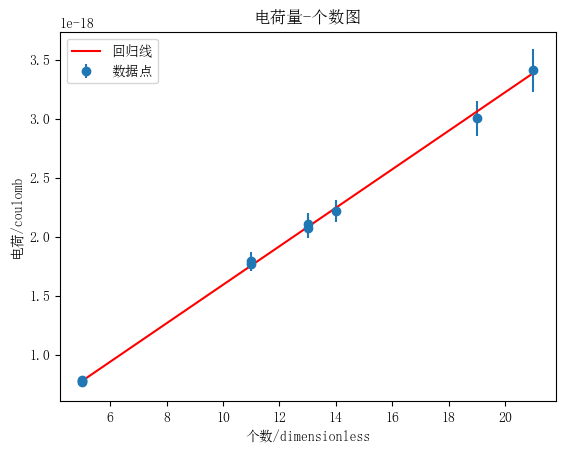

In [18]:
SLR.绘制回归图(Q_(x),q,"电荷量-个数图","个数","电荷")

## 作图法

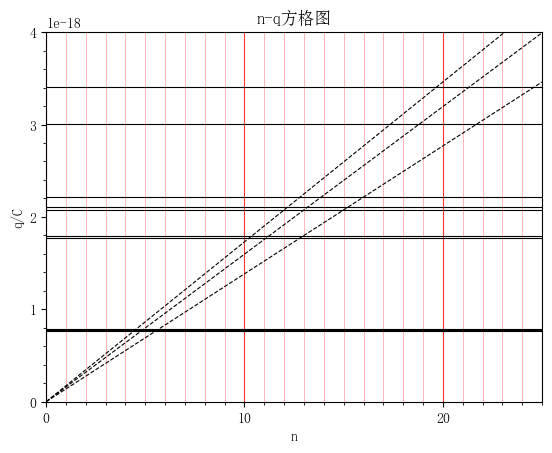

In [19]:
for i in y:
    plt.plot([0,25],[i.n,i.n],"k",linewidth=0.8)
plt.title("n-q方格图")
plt.xlabel("n")
plt.ylabel("q/C")
plt.xlim([0,25])
plt.ylim([0,4e-18])
plt.xticks([0,10,20])
plt.yticks([0,1e-18,2e-18,3e-18,4e-18])
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(n=10))
# plt.gca().yaxis.set_minor_locator(AutoMinorLocator(n=10))
plt.grid(axis='x',which='major',  linewidth=0.8, color='r', alpha=0.8)  # 主网格
plt.grid(axis='x',which='minor',  linewidth=0.4, color='r', alpha=0.5)  # 次网格
for i in [12,13,15]:
    plt.plot([0,i,25],[0,y[0].n,25/i*y[0].n],"--",c="k",linewidth=0.8)
plt.show()

中间的射线更接近所有格点，取所有格点的平均，结果与平均法相同。本方法优势是不需要已知基本电荷值，可以验证电荷的量子性。

## 六、实验结果与分析
### 6.1 核心结果汇总
| 方法         | 基本电荷 $ e $（含不确定度） | 相对误差 |
|--------------|-------------------------------|----------|
| 平均法       | $ (1.60 \pm 0.03) \times 10^{-19} \, \text{C} $ | 0.24%    |
| 加权线性拟合 | $ (1.63 \pm 0.05) \times 10^{-19} \, \text{C} $ | 1.7%    |
| 作图法       | $ (1.60 \pm 0.03) \times 10^{-19} \, \text{C} $ | 0.24%    |

### 6.2 结果分析
1. 三种方法测得的基本电荷 $ e $ 均与公认值 $ 1.602176634 \times 10^{-19} \, \text{C} $ 接近，相对误差均小于2%，验证了电荷的量子化特性；
2. 作图法通过 $ n-q $ 方格图直观验证了“电荷量是基本电荷整数倍”；

## 七、实验结论
1. 本实验通过密立根油滴法成功测量了基本电荷 $ e $，三种方法的测量结果均与公认值一致，其中平均法的相对误差最小（0.24%），最终实验结果为 $ e = (1.60 \pm 0.03) \times 10^{-19} \, \text{C} $；
2. 实验结果验证了电荷的量子化特性，即带电体的电荷量是基本电荷的整数倍；
3. `uncertainties`库实现了便捷的不确定度计算，`pint`库规范了物理量单位管理，`phyexp`库简化了加权线性拟合等复杂数据处理流程，提高了实验效率和计算准确性，适用于物理实验中的数据处理场景。